In [ ]:
import pandas as pd
import csv
from matplotlib import pyplot as plt
import multiprocessing
import numpy as np
import datetime
from collections import Counter

plt.rcParams['figure.figsize'] = [15, 14]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
BASIC_PATH = "drive/My Drive/IDC/Recommendations_Systems/movies_ratings/ml-100k/"

RATINGS_DATASET_PATH = BASIC_PATH + "u.data"
INFO_PATH = BASIC_PATH + "u.info"
ITEM_PATH = BASIC_PATH + "u.item"
GENRE_PATH = BASIC_PATH + "u.genre"
USER_PATH = BASIC_PATH + "u.user"
OCCUPATION_PATH = BASIC_PATH + "u.occupation"

# Data Import

In [ ]:
NUM_OF_USERS = 943
NUM_OF_ITEMS = 1682
NUM_OF_RATINGS = 100000

In [ ]:
def read_file(path, delimeter='|'):
    with open(path) as f:
        reader = csv.reader(f, delimiter=delimeter)
        data = list(reader)
    return data

In [ ]:
ratings_dataset = pd.read_csv(RATINGS_DATASET_PATH, delimiter='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
ratings_dataset

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
MOVIES_DATASET_HEADER = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western".replace(' | ', '|').replace(' ', '_').split('|')
GENRES_LIST = MOVIES_DATASET_HEADER[-19:]
movies_dataset = pd.read_csv(ITEM_PATH, delimiter='|', names=MOVIES_DATASET_HEADER, encoding='latin1' )
movies_dataset

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
USERS_HEADERS = "user id | age | gender | occupation | zip code".replace(' | ', '|').replace(' ', '_').split('|')
users_dataset = pd.read_csv(USER_PATH, delimiter='|', names=USERS_HEADERS, encoding='latin1')
users_dataset

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
GENRES_LIST

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [ ]:
OCCUPATION_LIST = [item[0] for item in read_file(OCCUPATION_PATH)]
OCCUPATION_LIST

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

# Data Analysis

In [ ]:
users_dataset

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
USERS_HEADERS

['user_id', 'age', 'gender', 'occupation', 'zip_code']

Text(0, 0.5, 'Frequency')

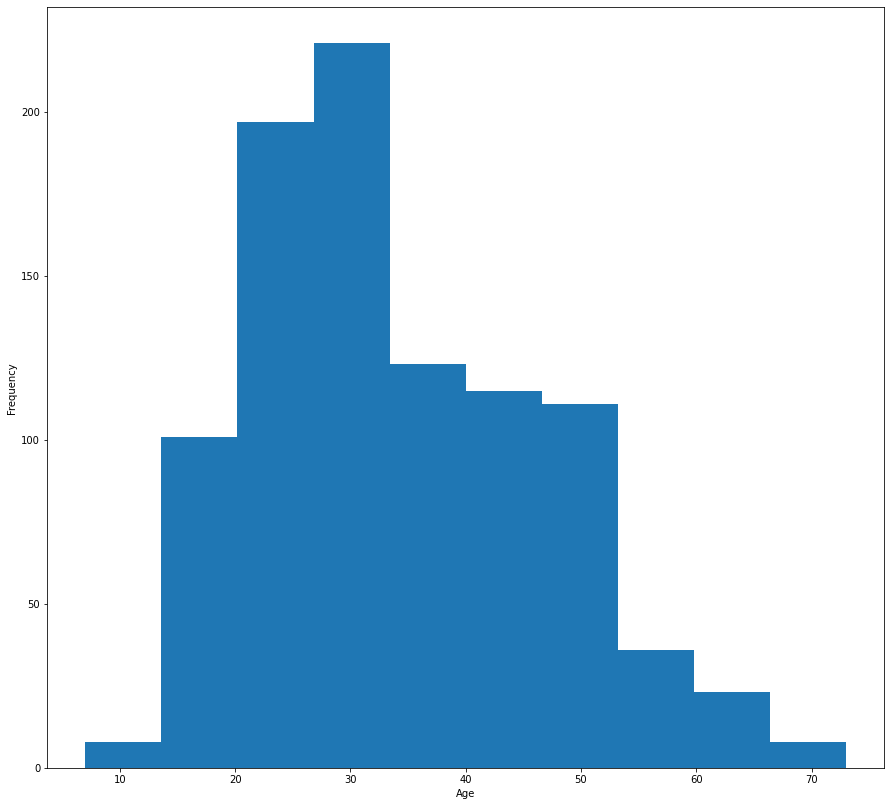

In [ ]:
plt.hist(list(users_dataset['age']))
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

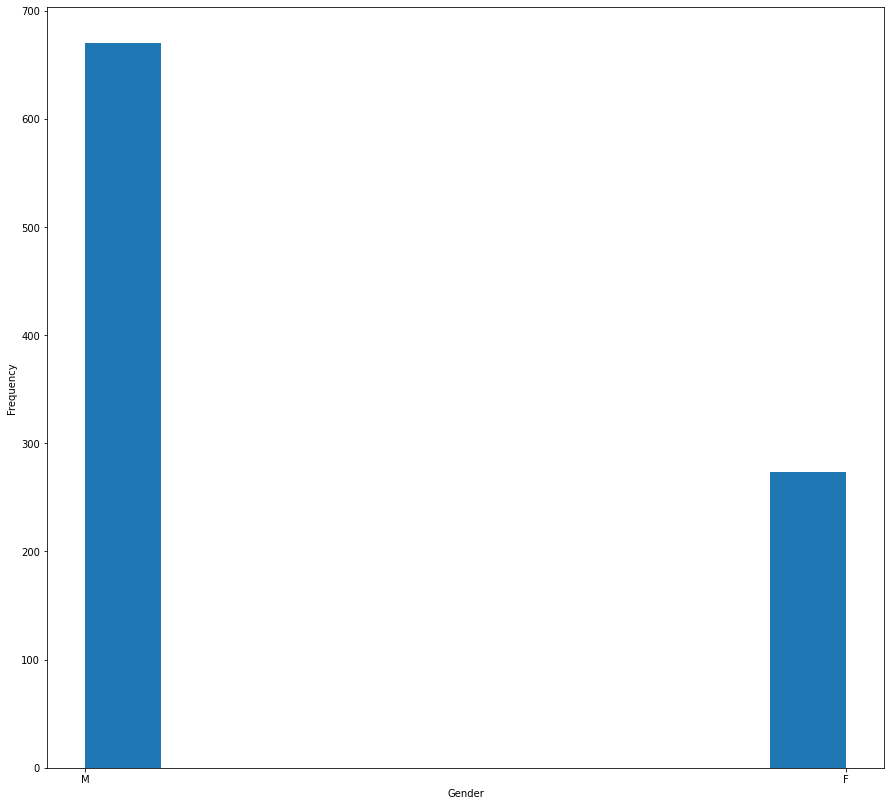

In [ ]:
plt.hist(list(users_dataset['gender']))
plt.xlabel('Gender')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

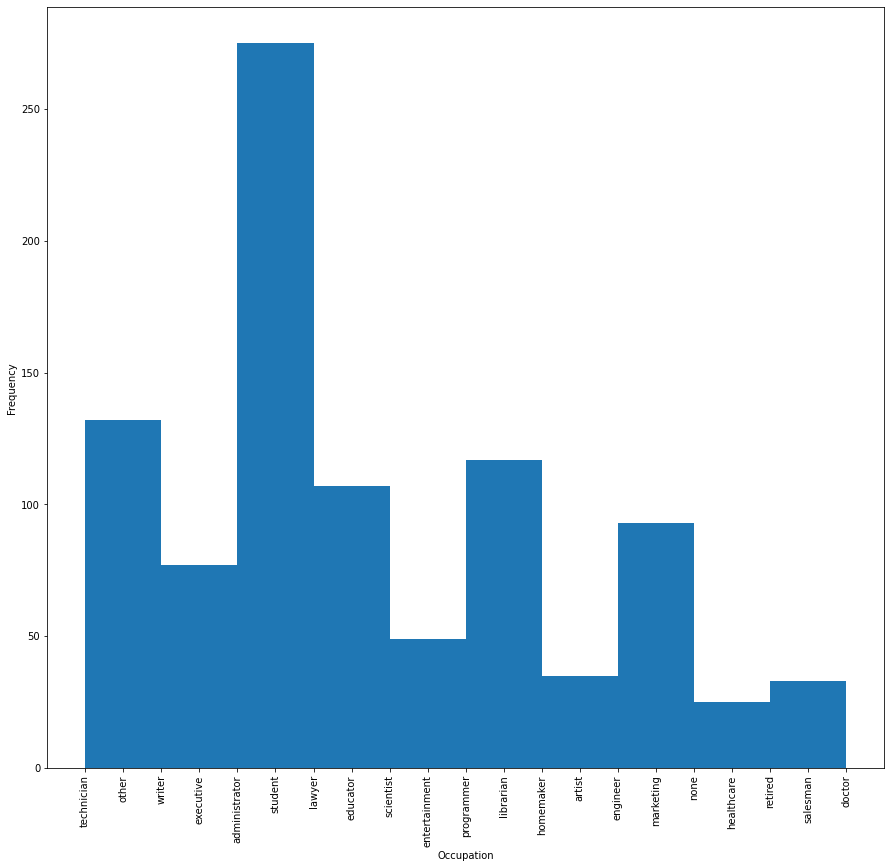

In [ ]:
plt.hist(list(users_dataset['occupation']))
plt.xticks(rotation='vertical')
plt.xlabel('Occupation')
plt.ylabel('Frequency')


unknown          2
Action         251
Adventure      135
Animation       42
Children's     122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


Text(0.5, 0, 'Genre')

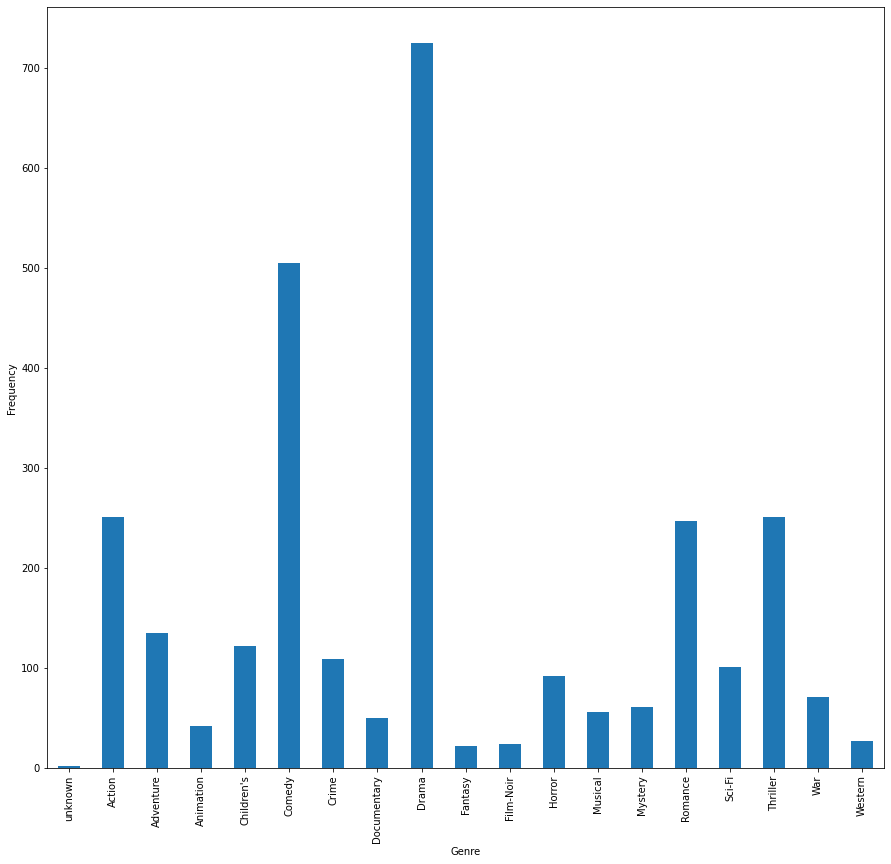

In [ ]:
print(movies_dataset[GENRES_LIST].sum(axis=0))
movies_dataset[GENRES_LIST].sum(axis=0).plot(kind="bar")
plt.ylabel('Frequency')
plt.xlabel('Genre')


### Note:  
We can see that the data is not genre balanced (there are much more samples in 'Drama' & 'Comedy' and on the other hand rare rate for 'Western' or 'Fantasy')

In [ ]:
ratings_dataset

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [ ]:
ratings_dataset.groupby(by='user_id').count()

,item_id,rating,timestamp
user_id,,,
1,272,272,272
2,62,62,62
3,54,54,54
4,24,24,24
5,175,175,175
...,...,...,...
939,49,49,49
940,107,107,107
941,22,22,22


Text(0.5, 0, 'Rating Avg. per user')

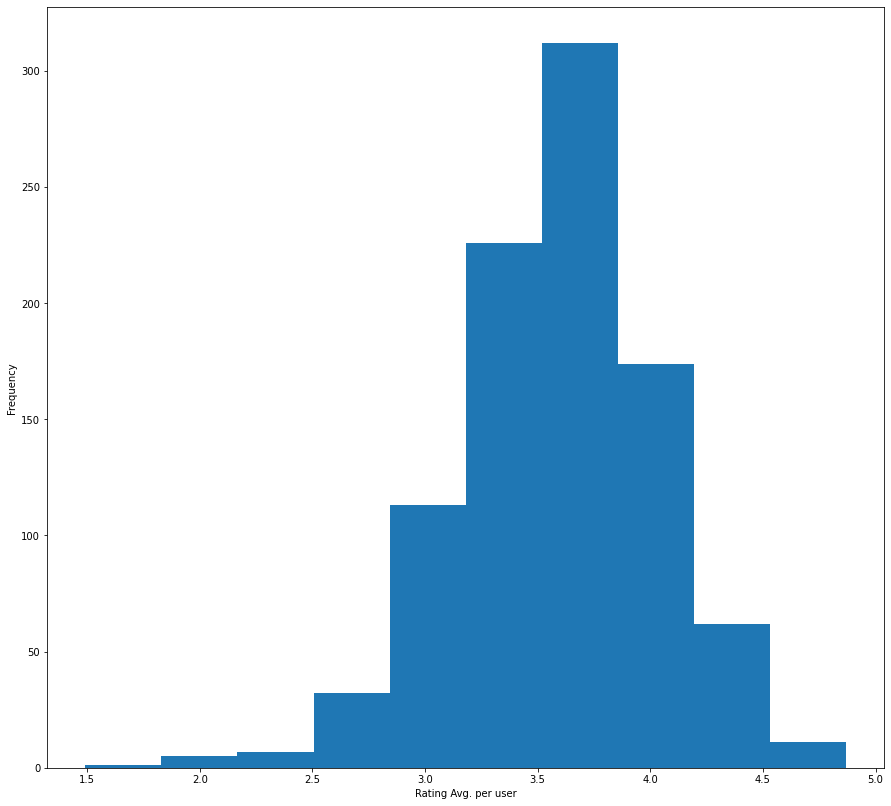

In [ ]:
ratings_dataset.groupby('user_id')['rating'].mean().plot(kind="hist")
plt.xlabel('Rating Avg. per user')


#### The most popular avg. rating is ~3.7. We get a normal distribution around this mean - as we expected.